# Load things up

In [1]:
import numpy as np
import glob
%pylab inline --no-import-all
plt.rc('font', family='serif', serif='Times',size=20)
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=20)
plt.rc('xtick.major', size=10)
plt.rc('ytick.major', size=10)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.rc('figure',titlesize=20)
plt.rc('image',origin='lower',interpolation='nearest')

from astropy.io import fits
import sys
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
from crispy.tools.initLogger import getLogger
log = getLogger('crispy')
os.chdir('/Users/mrizzo/IFS/crispy/crispy/HCIFS/')

In [3]:
from params import Params
par = Params()
par.hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
COMMENT                                                                         
COMMENT ************************************************************            
COMMENT ********************** General parameters ******************            
COMMENT ************************************************************            
COMMENT                                                                         
NLENS   =                  107 / # lenslets across array                        
PITCH   =            8.572E-05 / Lenslet pitch (meters)                         
INTERLAC=                  2.0 / Interlacing                                    
PHILENS =    26.565051177077

# Load files

In [4]:
# note that I changed the filenames to make sure they sort in the way I expect
folder = '/Users/mrizzo/IFS/HCIFS/Flats2/'
file_list = os.listdir(folder)
file_list.sort()
orig_filelist = [folder+val for val in file_list[:-1]]
par.lamlist = [550.,577.,600.,620.,632.8,640.,650.,670.,694.3,720.,740.]

log.info(orig_filelist)
log.info(par.lamlist)

crispy - INFO - ['/Users/mrizzo/IFS/HCIFS/Flats2/channel01_flat(1).fits', '/Users/mrizzo/IFS/HCIFS/Flats2/channel02_flat(1).fits', '/Users/mrizzo/IFS/HCIFS/Flats2/channel03_flat(1).fits', '/Users/mrizzo/IFS/HCIFS/Flats2/channel04_flat(1).fits', '/Users/mrizzo/IFS/HCIFS/Flats2/channel05_flat(1).fits', '/Users/mrizzo/IFS/HCIFS/Flats2/channel06_flat(1).fits', '/Users/mrizzo/IFS/HCIFS/Flats2/channel07_flat(1).fits', '/Users/mrizzo/IFS/HCIFS/Flats2/channel08_flat(1).fits', '/Users/mrizzo/IFS/HCIFS/Flats2/channel09_flat(1).fits', '/Users/mrizzo/IFS/HCIFS/Flats2/channel10_flat(1).fits', '/Users/mrizzo/IFS/HCIFS/Flats2/channel11_flat(1).fits']
crispy - INFO - [550.0, 577.0, 600.0, 620.0, 632.8, 640.0, 650.0, 670.0, 694.3, 720.0, 740.0]


# Flip the x axis of the images in order for the dispersion direction to go from left to right as the wavelength increases

In [5]:
par.filelist = []
for fname in orig_filelist:
    img = fits.getdata(fname)[:,::-1]
    new_fname = par.wavecalDir+fname.split('/')[-1]
    fits.writeto(new_fname,img,overwrite=True)
    par.filelist.append(new_fname)
log.info(par.filelist)

crispy - INFO - ['..//ReferenceFiles/wavecalHCIFS/channel01_flat(1).fits', '..//ReferenceFiles/wavecalHCIFS/channel02_flat(1).fits', '..//ReferenceFiles/wavecalHCIFS/channel03_flat(1).fits', '..//ReferenceFiles/wavecalHCIFS/channel04_flat(1).fits', '..//ReferenceFiles/wavecalHCIFS/channel05_flat(1).fits', '..//ReferenceFiles/wavecalHCIFS/channel06_flat(1).fits', '..//ReferenceFiles/wavecalHCIFS/channel07_flat(1).fits', '..//ReferenceFiles/wavecalHCIFS/channel08_flat(1).fits', '..//ReferenceFiles/wavecalHCIFS/channel09_flat(1).fits', '..//ReferenceFiles/wavecalHCIFS/channel10_flat(1).fits', '..//ReferenceFiles/wavecalHCIFS/channel11_flat(1).fits']


In [6]:
from crispy.tools.wavecal import buildcalibrations
buildcalibrations(par,
                    inspect=True,         # if True, constructs a bunch of images to verify a good calibration
                    inspect_first=True,         # if True, constructs an image to verify a good calibration
                    genwavelengthsol=True, # Compute wavelength at the center of all pixels
                    makehiresPSFlets=True, # this requires very high SNR on the monochromatic frames
                    makePSFWidths=True,
                    makePolychrome=True,   # This is needed to use least squares extraction
                    upsample=3,            # upsampling factor of the high-resolution PSFLets
                    nsubarr=3,             # the detector is divided into nsubarr^2 regions for PSFLet averaging
                    apodize=False,          # to match PSFlet spot locations, only use the inner circular part of the 
                                           #detector, hence discarding the corners of the detector where lenslets are 
                                           #distorted
                    finecal=False
                  ) 

crispy - INFO - Building calibration files, placing results in ..//ReferenceFiles/wavecalHCIFS/
crispy - INFO - Read data from HDU 0 of ..//ReferenceFiles/wavecalHCIFS/channel01_flat(1).fits
crispy - INFO - Read data from HDU 0 of ..//ReferenceFiles/wavecalHCIFS/channel01_flat(1).fits
crispy - INFO - Mean, median, std: (2.790538370328687, 2.6699999999998454, 3.4030098257172874)
crispy - INFO - Initializing PSFlet location transformation coefficients
crispy - INFO - Performing initial optimization of PSFlet location transformation coefficients for frame ..//ReferenceFiles/wavecalHCIFS/channel01_flat(1).fits
crispy - INFO - Array origin: (514.0898162762572, 513.5843386631885)
crispy - INFO - Performing final optimization of PSFlet location transformation coefficients for frame ..//ReferenceFiles/wavecalHCIFS/channel01_flat(1).fits
crispy - INFO - Array origin: (514.3461855366253, 513.6141252146438)
crispy - INFO - Read data from HDU 0 of ..//ReferenceFiles/wavecalHCIFS/channel02_flat(1).

In [35]:
from crispy.IFS import reduceIFSMap
cube = reduceIFSMap(par,par.filelist[5],
                        method='sum',medsub=False
                       )

crispy - INFO - Read data from HDU 0 of ..//ReferenceFiles/wavecalHCIFS/channel06_flat(1).fits
crispy - INFO - Mean, median, std: (3.000264206228176, 2.8300000000001546, 3.556077062032809)
crispy - INFO - Reduced cube will have 29 wavelength bins
crispy - WARNING - No PSFLet widths found - assuming critical samping at central wavelength
crispy - INFO - Elapsed time: 2.768274s


# Some analysis of the extracted cube

In [31]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.io import fits
from scipy import interpolate

def gauss(x, a, x0, sig,b,c):
    '''
    Simple gaussian function with usual inputs
    '''
    return c+b*x+a*np.exp(-(x-x0)**2/(2.*sig**2))
    

def fit_monochromatic_cube( cube,
                            lamlist,
                            returnAll = False,
                            sigma_guess = 5):
    '''
    Fits an extracted data cube with a gaussian to find the wavelength peak
    
    Parameters
    ----------
    cube: 3D ndarray
        The extracted datacube where all bad pixels are NaNs
    lamlist: 1D array
        List of wavelengths corresponding to the slices of the cube
        Suggested units: nanometers (in which sigma_guess is about 5)
    returnAll: boolean
        If True, return the full results of the curve fit function (popt,pcov)
        If False, return only the central wavelength (Default)
    sigma_guess: float
        Guess at the width of the gaussian fit in same units as lamlist (Default 5)
    '''
    vals = np.nanmean(cube,axis=(1,2))
    popt, pcov = curve_fit( gauss,
                            lamlist,
                            vals,
                            p0=[np.amax(vals),lamlist[np.argmax(vals)],sigma_guess,0,0]
                            )
    if returnAll: return popt,pcov
    else: return popt[1]


    ## to reconstruct gaussian function, use;
    # gauss(lamlist,*popt)

def plotfit(cube,lamlist):
    vals = np.nanmean(cube,axis=(1,2))
    popt, pcov = fit_monochromatic_cube(cube,lamlist,returnAll=True)
    curve_vals = gauss(lamlist, *popt)
    print popt[1]
    plt.figure(figsize=(10,10))
    plt.plot(lamlist,curve_vals,label='Fitted')
    plt.plot(lamlist,vals,label='Data')
    plt.legend()


crispy - INFO - Reduced cube will have 29 wavelength bins
[ 2.20921732  2.24793108  2.2636155   2.22509734  2.22640262  2.2907836
  2.38484392  2.5196726   2.78336765  3.60501625  4.15379466  4.33397786
  6.15626477 14.00778507 27.88233981 24.86046927 11.25152104  5.33326661
  3.17837708  2.35381454  2.11378861  1.97701401  1.988612    1.98934215
  2.02580478  2.09479108  2.13492592  2.23366451  2.2768853 ]
640.4851973581765


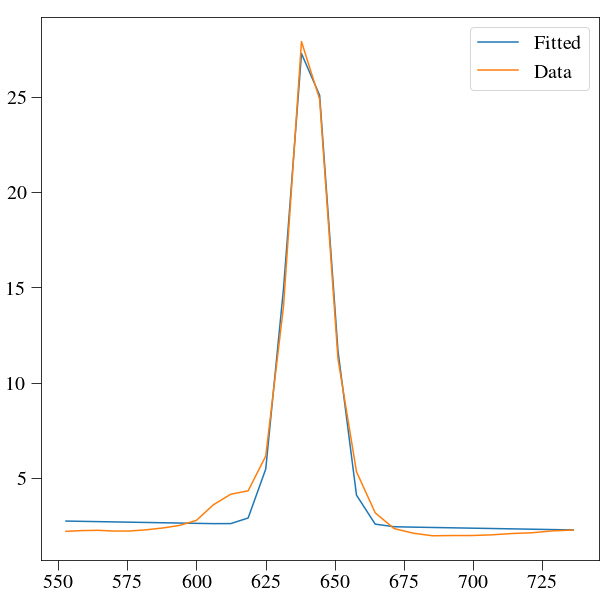

In [32]:
from crispy.tools.reduction import calculateWaveList
lam_midpts,lam_endpts = calculateWaveList(par,method='optext')
plotfit(cube.data,lam_midpts)

In [33]:
log.info("Expected wavelength:",par.lamlist[5])
log.info("Measured mean wavelength after extraction:",fit_monochromatic_cube(cube.data,lam_midpts))

Expected Wavelength: 640.0
Measured Wavelength after extraction: 640.4851973581765


In [36]:
lamsol = np.loadtxt(par.wavecalDir + "lamsol.dat")[:, 0]
allcoef = np.loadtxt(par.wavecalDir + "lamsol.dat")[:, 1:]
log.info(lamsol)
log.info(allcoef[4])

crispy - INFO - [550.  577.  600.  620.  632.8 640.  650.  670.  694.3 720.  740. ]
crispy - INFO - [ 5.28699303e+02  1.21103371e+01 -2.66977922e-02  5.18853952e-05
 -5.82616628e+00  7.66217760e-03 -3.77157241e-05 -2.04574213e-02
  4.59146323e-05 -1.89136158e-05  5.13458898e+02  6.02230589e+00
  6.97245896e-05  1.67325729e-06  1.19043451e+01 -5.80152814e-05
  6.60126760e-07  1.99188871e-04  1.00529545e-06  2.49811677e-06]


In [38]:
from crispy.tools.locate_psflets import PSFLets,transform

xindx = np.arange(-par.nlens / 2, par.nlens / 2)
xindx, yindx = np.meshgrid(xindx, xindx)

psftool = PSFLets()
psftool.geninterparray(lamsol, allcoef)
print(psftool.interp_arr)
x,y = psftool.return_locations(lamsol[4], allcoef, xindx, yindx)
x,y = transform(xindx, yindx, 3, allcoef[4])
print(x[par.nlens//2,par.nlens//2+1])
print(y[par.nlens//2,par.nlens//2+1])

[[ 1.76620729e+03 -8.67300272e+01  1.22766728e+00  4.22321507e-02
  -2.80159321e+01 -5.09876623e-01 -1.39630291e-02  1.24336373e+00
   4.18636119e-02  5.39421698e-02  1.94394462e+03  4.63670528e+01
  -1.42508255e+00 -3.98257092e-03 -8.12043934e+01  1.95790753e-01
   2.88563145e-03 -5.53403887e-01 -1.53222338e-01  4.11222778e-02]
 [-8.65271781e+02  4.44795150e+01 -5.87285902e-01 -1.93965015e-02
   1.16486049e+01  2.35051585e-01  5.89833233e-03 -5.94804180e-01
  -1.96758862e-02 -2.54500156e-02 -6.49350253e+02 -1.87035902e+01
   6.56977294e-01  1.85239544e-03  4.31982411e+01 -9.10583375e-02
  -1.45174796e-03  2.52409629e-01  7.08166887e-02 -1.91906068e-02]
 [ 1.63228426e+02 -6.65921308e+00  9.14286246e-02  2.97181935e-03
  -2.00959247e+00 -3.54678280e-02 -8.25827808e-04  9.31314680e-02
   3.08239521e-03  3.99843489e-03  9.83046854e+01  2.89071804e+00
  -1.00937296e-01 -2.87160176e-04 -6.67881733e+00  1.41156445e-02
   2.40945548e-04 -3.83387285e-02 -1.09089154e-02  2.98399700e-03]
 [-9.11

SyntaxError: invalid syntax (<ipython-input-39-00c4c2fa2a40>, line 1)